In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_dir = './datas/SSMA_Cleaned.csv'
df = pd.read_csv(file_dir)

In [3]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level',
       'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'is_Relationship',
       'Conflicts_Over_Social_Media', 'Addicted_Score',
       'Most_Used_Platform_Facebook', 'Most_Used_Platform_Instagram',
       'Most_Used_Platform_KakaoTalk', 'Most_Used_Platform_LINE',
       'Most_Used_Platform_LinkedIn', 'Most_Used_Platform_Snapchat',
       'Most_Used_Platform_TikTok', 'Most_Used_Platform_Twitter',
       'Most_Used_Platform_VKontakte', 'Most_Used_Platform_WeChat',
       'Most_Used_Platform_WhatsApp', 'Most_Used_Platform_YouTube'],
      dtype='object')

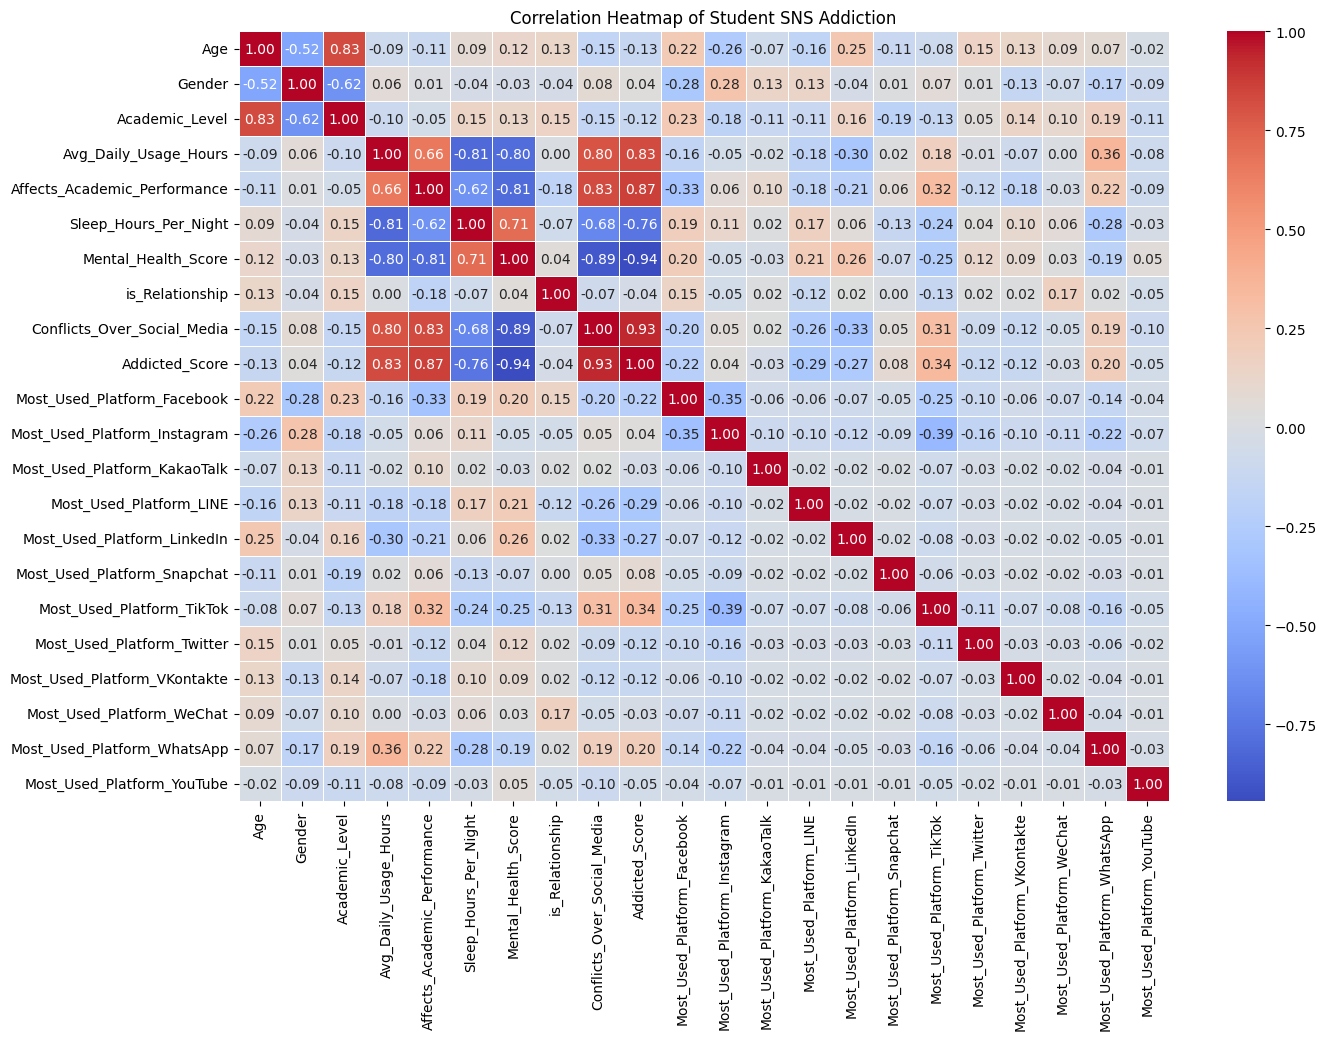

In [ ]:
# 상관계수 계산
corr = df.drop(columns=['Student_ID']).corr()

# 히트맵 그리기
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Student SNS Addiction')
plt.show()

상관 계수만 보더라도 상당히 많은 부분을 알 수 있다.   

1. 나이와 학력은 거의 동일하게 적용된다   
이는 조사 대상들이 대부분 학교를 다니는 상태의 사람들을 조사했다는 의미와 같다.   
'High School': 0, 'Undergraduate': 1, 'Graduate': 2 이렇게 전처리를 했는데   
나이가 올라갈 수록 학력도 높다는 당연한 논리가 적용되고 있다   

2. 하루 SNS 사용량은 SNS의 갈등과 중독 정도 및 성적에 영향이 있을 확률을 높인다     
하루 SNS를 많이 사용하면 SNS에서 갈등을 겪고 있을 확률이 높고, SNS 중독으로 판별할 가능성이 높다는 의미이다.   
또한 하루 사용량이 많을수록 성적에 영향이 있다는 양의 상관관계가 있다.   

5. 하루 휴대폰 사용량이 많을수록 정신건강과 밤에 잠을 자는 시간이 줄어든다   
Avg_Daily_Usage_Hours가 높아질수록 Sleep_Hours_Per_Night, Mental_Health_Score는 줄어든다(음의 상관관계, 각각 -0.81, -0.80)   

3. 각 열들은 연애와 상관없다.   
연애 중인지 아닌지를 나타내는 is_Relationship 항목은 어떤 행과도 상관관계를 드러내지 않는다.   
여러 요소가 겹쳐서 다른 결과가 나올 수 있으나 행 하나만으로 따질때는 무엇을 한다고 연애를 못하거나 잘하지 않는다.

4. 이 데이터에서는 대학교에 간 남자가 많다.   
Gender와 Academic_Level의 상관관계는 -0.62이다. 즉, 음의 관계로 남자 0, 여자 1에 대해 0으로 쪽으로 갈수록 Academic_Level이 높다는 이야기이다.   
이는 더 높은 학력의 남성 표본이 평균적인 여성의 표본보다 많음을 의미한다   
나중에 데이터를 해석할 때, 신경 쓸 주의점이다.
데이터 표본이 한쪽으로 치우쳐 있음은 모델이 학습할 때,   
여자면 학력이 낮을 것이다, 라고 잘못된 편견을 학습할 수 있으므로 성별로 데이터를 나누거나 두 표본의 수를 맞추는 등의 처리를 한 후 살펴볼 필요가 있다


In [ ]:
# 성별에 따른 학력 분포 확인
pd.crosstab(df['Gender'], df['Academic_Level'], normalize='index')

# 확실하게 대학 졸업한 남성, 대학 과정 중인 여성이 많다

Academic_Level,0,1,2
Gender,,,
0,0.026706,0.160237,0.813056
1,0.026786,0.836310,0.136905


## 과제2. 위와 같이 어떤 상관관계가 있는지 분석해서 노션에 올리기 (위의 예제는 제외하고)